# Import Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [12]:
df_sales = pd.read_csv('Machine learning/Train.csv')
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Info

In [ ]:
df_sales.head()

In [13]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data Visualization & Feature Engineering

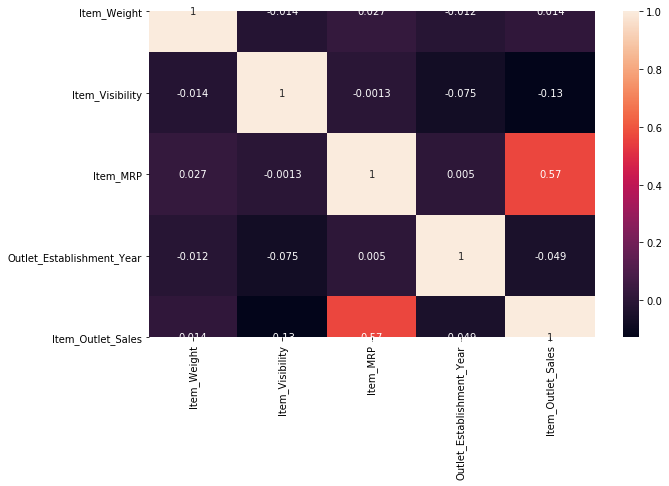

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df_sales.corr(),annot=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


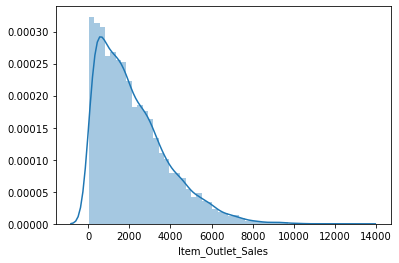

In [16]:
sns.distplot(df_sales['Item_Outlet_Sales'])

In [17]:
df_sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

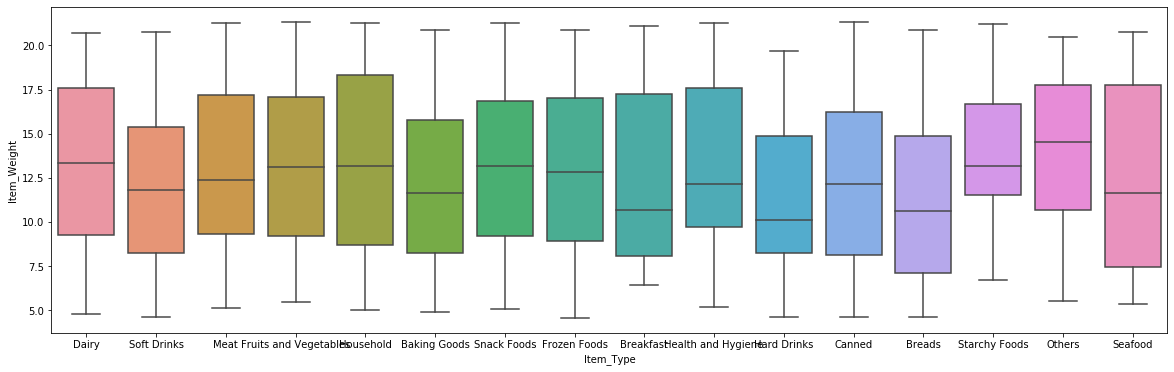

In [18]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Item_Type',y='Item_Weight',data=df_sales)

In [19]:
df_sales['Item_Weight'][df_sales['Item_Weight'].isnull()]=df_sales['Item_Weight'].mean()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


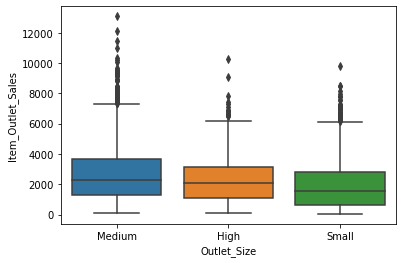

In [21]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data= df_sales)

In [22]:
ndf_sale=df_sales[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales',]]

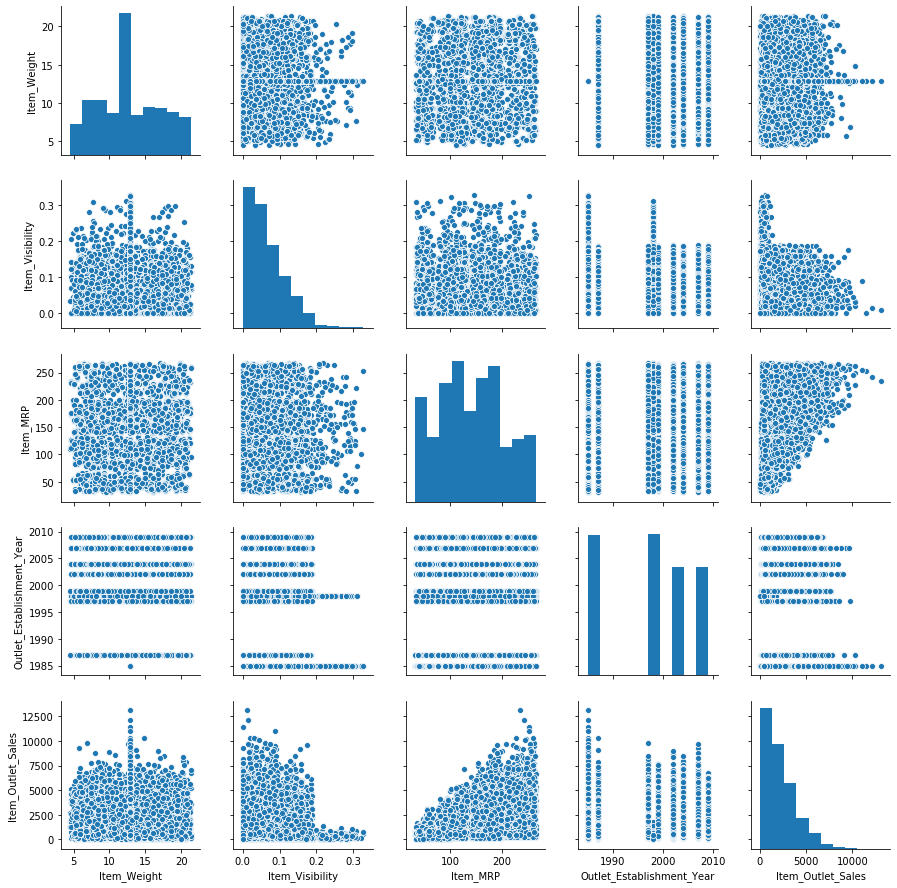

In [23]:
sns.pairplot(ndf_sale)

# Data Modeling

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X= ndf_sale.drop(['Item_Outlet_Sales'],axis=1)
y=ndf_sale['Item_Outlet_Sales']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=105)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model= LinearRegression()

In [31]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
print(model.intercept_)

27764.55354274775


In [33]:
print(model.coef_)

[   -5.76906086 -4533.85252827    15.61965466   -13.7182071 ]


In [34]:
cdf = pd.DataFrame(model.coef_,X.columns,columns=['Coeff'])

In [35]:
cdf

,Coeff
Item_Weight,-5.769061
Item_Visibility,-4533.852528
Item_MRP,15.619655
Outlet_Establishment_Year,-13.718207


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


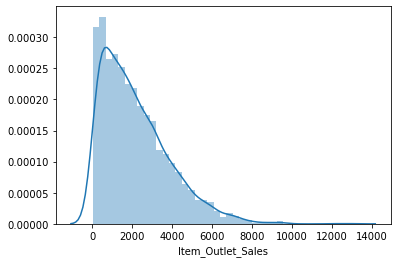

In [38]:
sns.distplot(y_test)

In [39]:
predictions=model.predict(X_test)

In [40]:
predictions

array([2604.20879243, 1932.53283172, 1688.15766043, ..., 3844.68718048,
       2251.79959129, 1696.52797497])

In [41]:
from sklearn import metrics

In [42]:
metrics.mean_absolute_error(y_test,predictions)

1033.177957795971

In [43]:
metrics.mean_squared_error(y_test,predictions)

1926432.4511107348

In [44]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

1387.9598161008607

# Import test Data

In [47]:
df_test_sales= pd.read_csv('Machine learning/Test.csv')

In [48]:
df_test_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


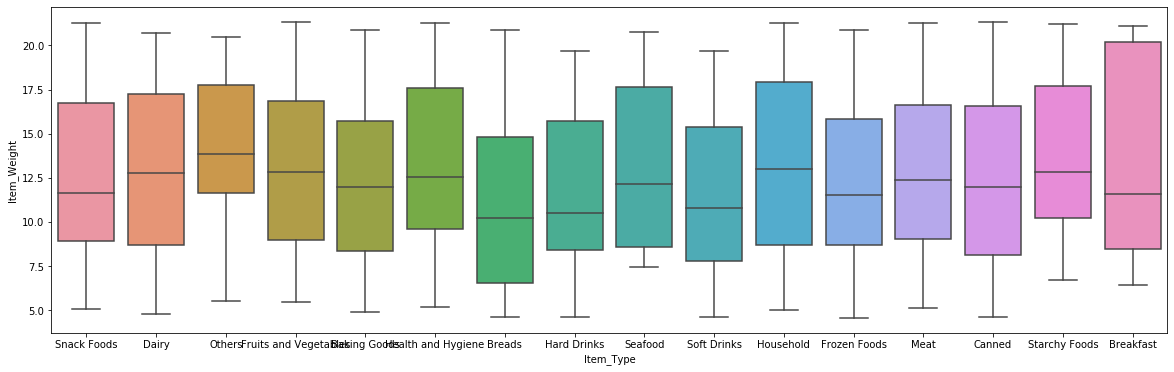

In [49]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Item_Type',y='Item_Weight',data=df_test_sales)

In [50]:
df_test_sales['Item_Weight'][df_test_sales['Item_Weight'].isnull()]= df_test_sales['Item_Weight'].mean()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


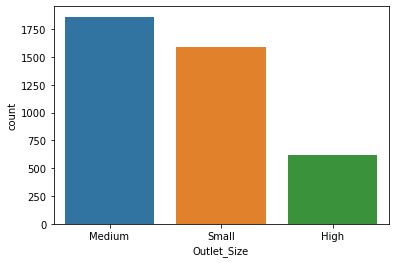

In [51]:
sns.countplot('Outlet_Size',data=df_test_sales)

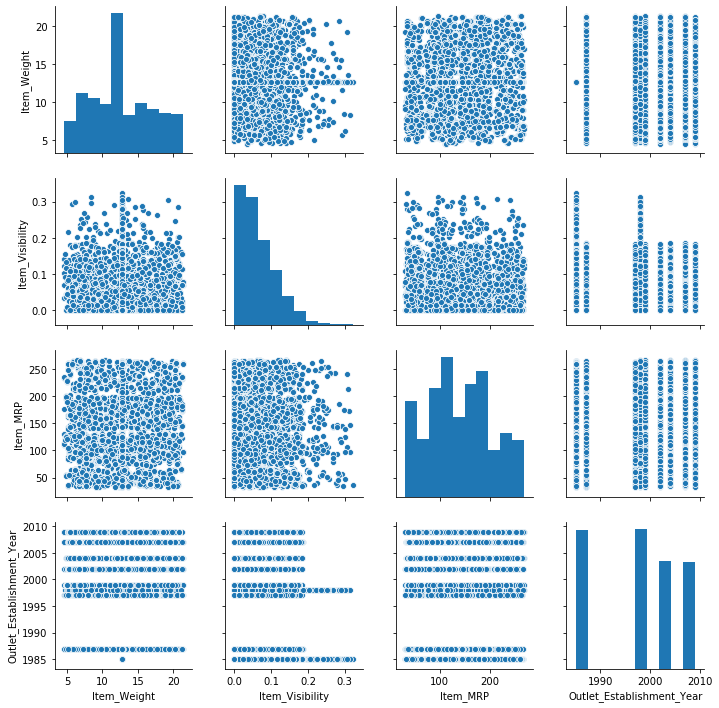

In [52]:
sns.pairplot(df_test_sales)

In [53]:
ndf_test_sale= df_test_sales[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']]

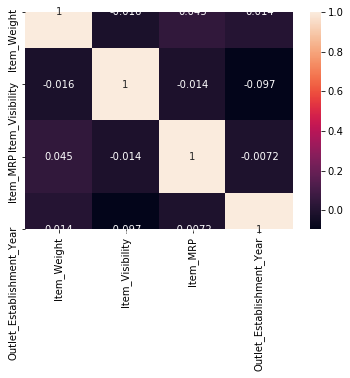

In [54]:
sns.heatmap(ndf_test_sale.corr(),annot=True)

In [55]:
X= ndf_test_sale

In [56]:
df_test_sales['Item_Outlet_Sales']=model.predict(X)

In [57]:
df_test_sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1872.621992
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1373.908380
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,3596.000380
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2541.720040
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,3581.550471
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2454.825576
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2154.514336
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1764.384932
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,3496.163652


In [58]:
data_frame= df_test_sales[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]

In [59]:
data_frame.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1872.621992
1,FDW14,OUT017,1373.908380
2,NCN55,OUT010,3596.000380
3,FDQ58,OUT017,2541.720040
4,FDY38,OUT027,3581.550471


In [62]:
data_frame.to_csv('Machine learning/Big Market Sales.csv',index=0)